# Image Aumentation

### Import Dependencies

In [1]:
import imageio
import imgaug as ia
import numpy as np
import cv2
import os

from random import *
from PIL import Image 
from imgaug import augmenters as iaa

%matplotlib inline

### Establish Image Directory

In [2]:
#--------------------------------------------------------------------------------------------------------------------------#
#Directory Path
#C:\Users\dylan\Documents\Senior Design\ME 71\Project Files\wind_turbines_original

### Load Images

In [2]:
#--------------------------------------------------------------------------------------------------------------------------#
#Setup
path = r'C:\Users\dylan\Documents\Senior Design\ME 71\Project Files\test_turbines\wind_turbines_original'
window_name = 'image'

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = imageio.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

image_set = load_images_from_folder(path)
#ia.imshow(image_set[0])

#--------------------------------------------------------------------------------------------------------------------------#

### Augment Images

In [3]:
#--------------------------------------------------------------------------------------------------------------------------#
#Augmentation
seq1 = iaa.Sequential([
    iaa.Resize({"height": 512, "width": 512}),
    iaa.CropAndPad(percent=(0.05), pad_mode="edge"),
    iaa.Fliplr(0.75)
],random_order = False)

seq2 = iaa.Sequential([
    iaa.SomeOf((6, 8),
    [
        #iaa.Snowflakes(density = 0.15,density_uniformity = 0.8,
        #              flake_size = .2,flake_size_uniformity = .9,
        #             angle = 130,speed = 0.01)
        #iaa.ElasticTransformation(alpha=0.03, sigma=0.01),  # water-like effect
        iaa.Affine(rotate=(-5, 5)),
        iaa.Sometimes(
            0.75,iaa.AdditiveGaussianNoise(scale=(0, 0.1*255),per_channel=True)
        ),
        iaa.Sometimes(
            0.25, iaa.Solarize(0.5, threshold=(102, 128))
        ),
        iaa.Sometimes(
            0.75, iaa.Cutout(nb_iterations=(2, 6), size=0.05, squared=False)
        ),  
        iaa.Sometimes(
            0.75, iaa.Invert(0.13)
        ),
        iaa.Sometimes(
            0.25,     iaa.PerspectiveTransform(scale=(0.01,0.05), keep_size=False)
        ),  
        iaa.Sometimes(
            0.5, iaa.Dropout(p=(0, 0.05)),
        ),  
        iaa.Sometimes(
            0.35, iaa.weather.CloudLayer(intensity_mean=[190,225], 
                             intensity_freq_exponent=[-2.5, -1.5],
                             intensity_coarse_scale=[3], alpha_min=[0.01], 
                             alpha_multiplier=[0.3], alpha_size_px_max=[100.8],
                             alpha_freq_exponent=[-4.0, -1.5], 
                             sparsity=[0.96], 
                             density_multiplier=[.8],
                             seed=None, name=None,
                             random_state='deprecated', 
                             deterministic='deprecated')
        ),  
        iaa.Sometimes(
            0.5, iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)))  
    ],
    random_order=True
    )
],random_order = True)

aug_image_1 = seq1(images = image_set[:])#change for whole set
aug_image_2 = aug_image_1#seq2(images = aug_image_1) 

aug_image_set = []
for i in range(len(aug_image_2)):
    aug_img = aug_image_2[i]
    aug_image_set.append(aug_img)
    
#--------------------------------------------------------------------------------------------------------------------------#

Augmented:


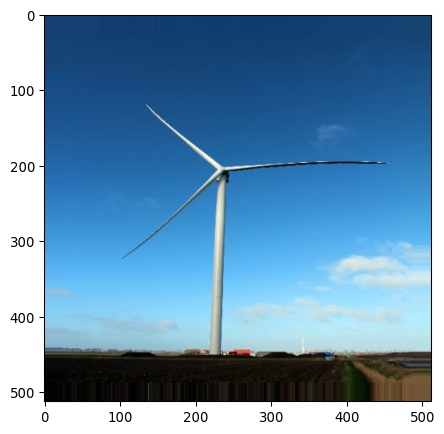

In [5]:
print("Augmented:")    
ia.imshow(aug_image_set[87])

### Save Augmented Images

In [6]:
new_path = r'C:\Users\dylan\Documents\Senior Design\ME 71\Project Files\test_turbines'

for i in range(len(aug_image_set)):
    imageio.imwrite(str(randint(1, 100))+str(randint(1, 100))+str(randint(1, 100))+str(i)+'.jpg', aug_image_set[i])

#### Snow Optional